In [1]:
#Import libraraies for spam classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import  accuracy_score,confusion_matrix, classification_report

In [2]:
#Read the data
data=pd.read_csv('spam.csv',encoding='latin-1')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [3]:
#Rename columns
data1 = data.rename(columns={"Category":"Label"})
data1.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
#Check the shape of the data
data1.shape

(5572, 2)

In [5]:
#Check missing values
data1.isnull().sum()

Label      0
Message    0
dtype: int64

In [6]:
#Drop duplicates
data1.drop_duplicates
print(data1)


     Label                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ã¼ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [7]:
#Check the distribution of spam and ham messages
class_distribution=data1['Label'].value_counts()
print(class_distribution)
spam_percentage = 100 * class_distribution['spam'] / len(data1)
print(f"Percentage of spam: {spam_percentage:.2f}%")



Label
ham     4825
spam     747
Name: count, dtype: int64
Percentage of spam: 13.41%


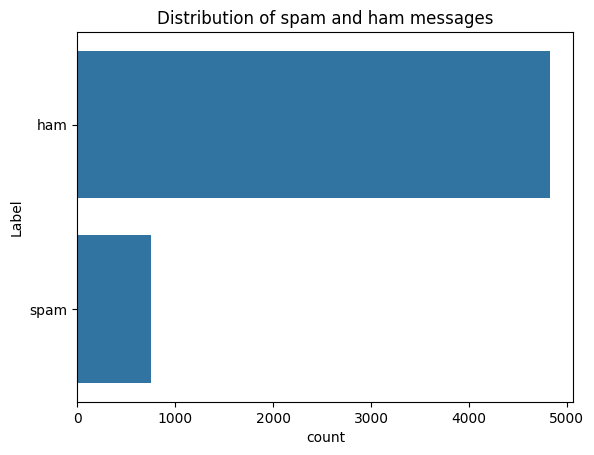

In [8]:
#Visualize the distribution of spam and ham messages
sns.countplot(data1['Label'])
plt.title('Distribution of spam and ham messages')
plt.show()

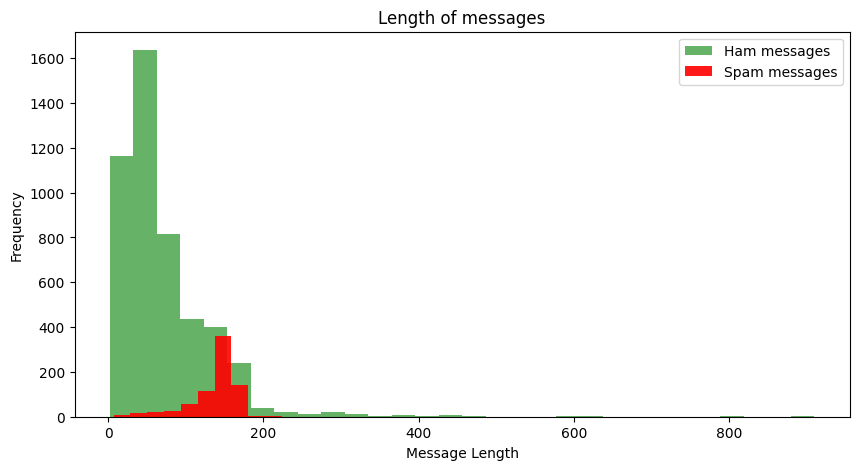

In [9]:
#Visualize the length of messages
data1['Length'] = data1['Message'].apply(len)
plt.figure(figsize=(10,5))
data1[data1.Label=='ham'].Length.plot(bins=30, kind='hist', color='green', label='Ham messages', alpha=0.6)
data1[data1.Label=='spam'].Length.plot(kind='hist', color='red', label='Spam messages', alpha=0.9)
plt.legend()
plt.xlabel("Message Length")
plt.title("Length of messages")
plt.show()

In [10]:
#Label encoding
encoder = LabelEncoder()
data1['Label'] = encoder.fit_transform(data1['Label'])
data1.head()

,Label,Message,Length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data1['Message'], data1['Label'], test_size=0.2, random_state=0)

In [12]:
# Vectorize text using CountVectorizer
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)


In [13]:
# Train a model with Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_counts, y_train)
print("Training Complete")

Training Complete


In [15]:
# Make predictions
y_pred = model.predict(X_test_counts)
# Calculate accuracy for the training model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.99


In [16]:
# Confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",matrix)


Confusion Matrix
 [[952   3]
 [ 12 148]]


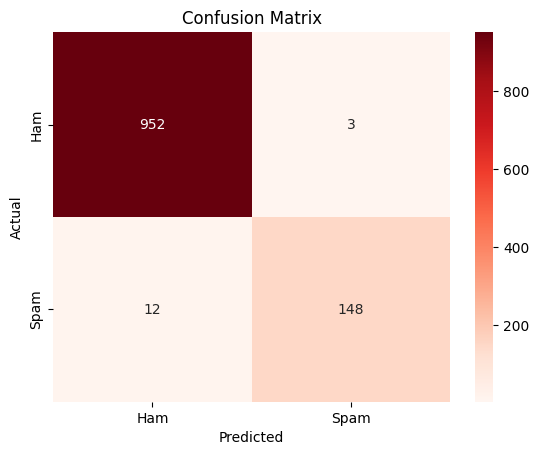

In [17]:
#Display confusion matrix
sns.heatmap(matrix,annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Ham', 'Spam'], 
            yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [18]:
# Classification report
report = classification_report(y_test, y_pred, target_names=['ham', 'spam'])
print("Classification Report\n",report)

Classification Report
               precision    recall  f1-score   support

         ham       0.99      1.00      0.99       955
        spam       0.98      0.93      0.95       160

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [19]:
#Predictions
def predict_spam(sample_message):
    sample_message_counts = vectorizer.transform([sample_message])
    return model.predict(sample_message_counts)


In [20]:
# Test the model with sample messages
sample_message1 = "You have won cash prize! Click here to claim prize!"
sample_message2 = "Hello, how are you?" 
sample_message3 = "Your account has been credited with $500."
sample_message4 = "URGENT! Your account has been compromised. Verify your details immediately to avoid suspension."
sample_message5 = "Thanks for your email. I'll get back to you with a response shortly."
sample_message6 = "You have been selected for a cash prize! Call now to claim."
sample_message7 = "Can you review the presentation slides I sent over?"
sample_message8 = "Get a personal loan instantly at 0% interest for the first 3 months. Apply now!"

print("Message 1:", (sample_message1),"\nPrediction:",predict_spam(sample_message1))
print("Message 2:", (sample_message2),"\nPrediction:",predict_spam(sample_message2))
print("Message 3:", (sample_message3),"\nPrediction:",predict_spam(sample_message3))
print("Message 4:", (sample_message4),"\nPrediction:",predict_spam(sample_message4))
print("Message 5:", (sample_message5),"\nPrediction:",predict_spam(sample_message5))
print("Message 6:", (sample_message6),"\nPrediction:",predict_spam(sample_message6))
print("Message 7:", (sample_message7),"\nPrediction:",predict_spam(sample_message7))
print("Message 8:", (sample_message8),"\nPrediction:",predict_spam(sample_message8))
#[1]:spam and [0]:ham

Message 1: You have won cash prize! Click here to claim prize! 
Prediction: [1]
Message 2: Hello, how are you? 
Prediction: [0]
Message 3: Your account has been credited with $500. 
Prediction: [1]
Message 4: URGENT! Your account has been compromised. Verify your details immediately to avoid suspension. 
Prediction: [1]
Message 5: Thanks for your email. I'll get back to you with a response shortly. 
Prediction: [0]
Message 6: You have been selected for a cash prize! Call now to claim. 
Prediction: [1]
Message 7: Can you review the presentation slides I sent over? 
Prediction: [0]
Message 8: Get a personal loan instantly at 0% interest for the first 3 months. Apply now! 
Prediction: [1]


In [21]:
print("The model is trained and tested sucessfully!")

The model is trained and tested sucessfully!


In [22]:
#Conclusion
#The model is able to classify spam and ham messages with high accuracy.
#Our model achieved 99% accuracy on the test set.
